# Analysis of the Voltage Output from a Triboelectric Energy Converter

Triboelectric Converters are devices that convert mechanical to electric energy via contact electrification followed by electrostatic induction.

When the device is tested, a vertical, repetitive and controlled tapping force is applied. The fisical contact, followed by a separation of the layers that constitute the device, induces an electric current in the external circuit that can be measured using an oscilloscope.

The followig file was obtained when testing a triboelectric converter using a tapping frequency of 2Hz and a force of 30N.

In [2]:
#import pandas lybrary
import pandas as pd

In [10]:
#defining the csv file path
path = "C:/Users/Utilizador/Documents/GitHub/PhD_reports/Smooth_4min_30N_2Hz.CSV"

In [23]:
#importing the content of the csv file into a df_ pandas dataframe 
df_ = pd.read_csv(path)

In [24]:
#visualize the first 20 lines of df_
df_.head(20)

,Model,"TBS1102C;;;;;;;""Source: """"C:\Users\Utilizador\OneDrive - FCT NOVA\Documentos_SyncGoogleDrive\1PHD Project\#6 Resultados\05 - Smooth & Porous PDMS\Electric Results S+P newSamples PFAM 2023\Smooth Dif-Forces-2Hz\TEK21830.CSV"""""""
0,Firmware Version,v2015-08-04-prequal4ch70_v1.3;;;;;;;
1,;;;;;;;,NaN
2,Point Format,Y;;;;;;;
3,Horizontal Units,S;;;;;;;
4,Horizontal Scale,0.1;;;;;;;
5,Sample Interval,0.0008;;;;;;;
6,Filter Frequency,2e+08;;;;;;;
7,Record Length,2000;;;;;;;
8,Gating,0.0% to 100.0%;;;;;;;
9,Probe Attenuation,10;;;;;;;


The first 15 lines of the csv file feature settings of the data aquisition that are not relevant for the analysis.

The actual data starts at line 16, so let's create a dataframe using only relevant data:

In [36]:
#importing the content of the csv file into a df pandas dataframe and skiping the first 15 lines of header
df = pd.read_csv(path, skiprows=15)

In [37]:
#visualize the first 5 lines of the new df
df.head()

,TIME,CH1;;;;;;;
0,-0.8000,0.4;;;;;;;
1,-0.7992,0.8;;;;;;;
2,-0.7984,0.8;;;;;;;
3,-0.7976,0.8;;;;;;;
4,-0.7968,1.2;;;;;;;


The original CSV file exported by the oscilloscope has weird ";;;;;;;" formating that should be fixed

In [38]:
#cleaning the ";;;;;;;" formating in the df
df = df.replace(';;;;;;;', '', regex=True)
df.head()

,TIME,CH1;;;;;;;
0,-0.8000,0.4
1,-0.7992,0.8
2,-0.7984,0.8
3,-0.7976,0.8
4,-0.7968,1.2


In [39]:
#renaming the column name
df.rename(columns={'CH1;;;;;;;':'Voltage (V)'}, inplace=True)
df.rename(columns={'TIME': 'Time (s)'}, inplace=True)
df.head()

,Time (s),Voltage (V)
0,-0.8000,0.4
1,-0.7992,0.8
2,-0.7984,0.8
3,-0.7976,0.8
4,-0.7968,1.2


Let's look at how many data aquisistion points there is (number of rows):

In [35]:
df.shape

(2000, 2)

The dataframe has 2000 rows and 2 columns. Let's explore its formating:

In [41]:
df.dtypes

Time (s)       float64
Voltage (V)     object
dtype: object

'Voltage (V)' is set as an object so let's convert it to a numerical type float:

In [43]:
df['Voltage (V)'] = df['Voltage (V)'].astype(float)
df.dtypes

Time (s)       float64
Voltage (V)    float64
dtype: object

Let's also look for any missing data in the dataframe:

In [44]:
df.isnull().sum()

Time (s)       0
Voltage (V)    0
dtype: int64

Since there are no missing values in the dataframe, we can proceed with the analysis.

Let's plot Voltage (V) vs Time (s)

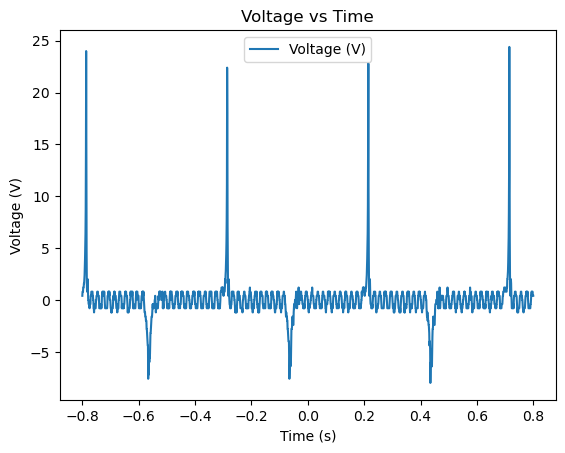

In [47]:
#importing matplotlib to help us visualize
import matplotlib.pyplot as plt

df.plot(x='Time (s)', y='Voltage (V)', kind='line')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')

plt.show()

Let's analyse one of the positive and negative peaks in more detail:

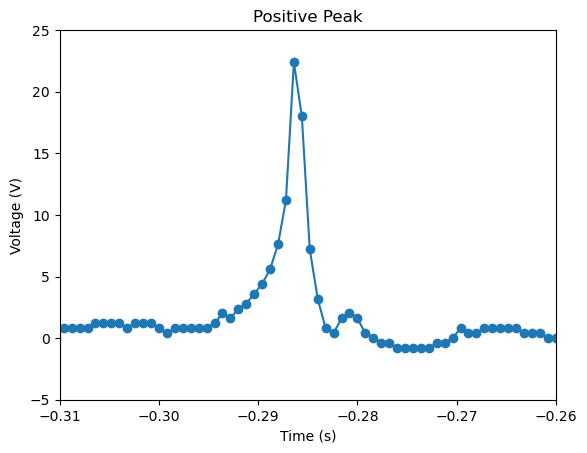

In [68]:
plt.plot(df['Time (s)'], df['Voltage (V)'])
plt.scatter(df['Time (s)'], df['Voltage (V)'])
plt.xlim(-.31, -.26)
plt.ylim(-5, 25)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Positive Peak')
plt.show()

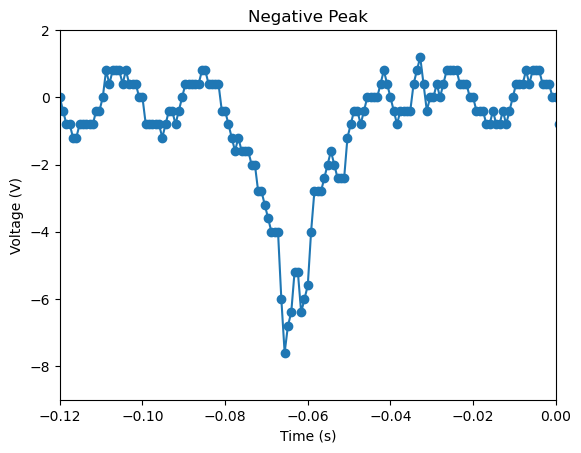

In [73]:
plt.plot(df['Time (s)'], df['Voltage (V)'])
plt.scatter(df['Time (s)'], df['Voltage (V)'])
plt.xlim(-.12, 0)
plt.ylim(-9, 2)

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Negative Peak')
plt.show()

Let's write an algoritm to find the local maximum and minimum - aka Positive and Negative Peaks, in the data

In [136]:
from scipy.signal import find_peaks

#Adjust parameters apropriatly
offset=3
distance=1

x = df['Time (s)']
y = df['Voltage (V)']
    
#Find local maxima (positive peaks)_
peaks, _ = find_peaks(y, height=offset, distance=distance)

#Get the x and y values of the peaks
pos_x_time = x.iloc[peaks].values
pos_y_peak = y.iloc[peaks].values

positive_peaks = pd.DataFrame({
        'time+ (s)': pos_x_time,
        'V+ peak (V)': pos_y_peak})

positive_peaks

,time+ (s),V+ peak (V)
0,-0.7864,24.0
1,-0.2864,22.4
2,0.2144,22.8
3,0.7144,24.4


In [137]:
#Find negative Peaks

#Adjust parameters apropriatly
offset=3
distance=12
    
#Find local maxima (positive peaks)_
peaks, _ = find_peaks(-y, height=offset, distance=distance)

#Get the x and y values of the peaks
neg_x_time = x.iloc[peaks].values
neg_y_peak = y.iloc[peaks].values

negative_peaks = pd.DataFrame({
        'time- (s)': neg_x_time,
        'V- peak (V)': neg_y_peak})

negative_peaks

,time- (s),V- peak (V)
0,-0.5664,-7.6
1,-0.0656,-7.6
2,0.4344,-8.0


Now lets label the peaks in the plot:

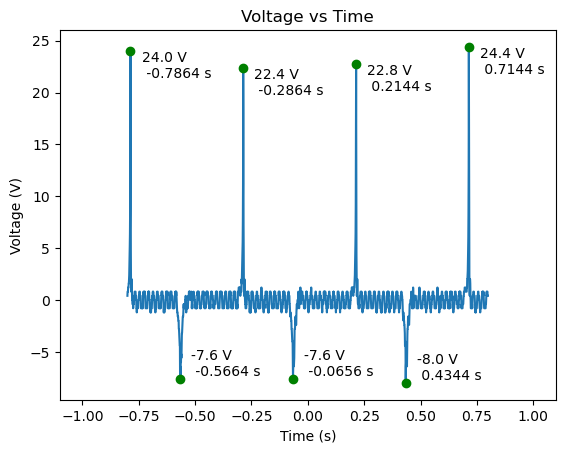

In [142]:
df.plot(x='Time (s)', y='Voltage (V)', kind='line')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')

for i, (peak, time_peak) in enumerate(zip(positive_peaks['V+ peak (V)'], positive_peaks['time+ (s)'])):
    plt.text(positive_peaks['time+ (s)'][i]+0.05, 
             positive_peaks['V+ peak (V)'][i], 
             f"{peak} V \n {time_peak} s", 
             ha='left', 
             va='top', 
             fontsize=10)
    plt.scatter(positive_peaks['time+ (s)'][i],
                 positive_peaks['V+ peak (V)'][i],
                color='green', 
                zorder=5)

for i, (peak, time_peak) in enumerate(zip(negative_peaks['V- peak (V)'], negative_peaks['time- (s)'])):
    plt.text(negative_peaks['time- (s)'][i]+0.05, 
             negative_peaks['V- peak (V)'][i], 
             f"{peak} V \n {time_peak} s", 
             ha='left', 
             va='bottom', 
             fontsize=10)
    plt.scatter(negative_peaks['time- (s)'][i],
                 negative_peaks['V- peak (V)'][i],
                color='green', 
                zorder=5)

plt.xlim(-1.1, 1.1)
plt.legend().set_visible(False)

plt.show()

In [141]:
df_summary = pd.concat([positive_peaks, negative_peaks], axis=1)
df_summary

,time+ (s),V+ peak (V),time- (s),V- peak (V)
0,-0.7864,24.0,-0.5664,-7.6
1,-0.2864,22.4,-0.0656,-7.6
2,0.2144,22.8,0.4344,-8.0
3,0.7144,24.4,NaN,NaN


For a set of 3 positive+negative peaks, let's calculate the Vpp (peak to peak voltage).

Since the following analysis must consider pair of positive and negative peaks, and the 4th set is lacking the negative peak, let's delete it.

In [146]:
df_summary.drop(3, inplace=True)
df_summary

,time+ (s),V+ peak (V),time- (s),V- peak (V)
0,-0.7864,24.0,-0.5664,-7.6
1,-0.2864,22.4,-0.0656,-7.6
2,0.2144,22.8,0.4344,-8.0


In [163]:
#creating a new collumn for Vpp
df_summary['Vpp']

for l in range(len(df_summary)):
    df_summary.loc[l, 'Vpp'] = abs(df_summary.loc[l, 'V+ peak (V)']) + abs(df_summary.loc[l, 'V- peak (V)'])

df_summary

,time+ (s),V+ peak (V),time- (s),V- peak (V),Vpp
0,-0.7864,24.0,-0.5664,-7.6,31.6
1,-0.2864,22.4,-0.0656,-7.6,30.0
2,0.2144,22.8,0.4344,-8.0,30.8


Let's export df_summary to an excel file.

In [165]:
df_summary.to_csv('Peak_Analysis.csv')